# Visualizing Barren Plateaus

[References](https://github.com/Gopal-Dahale/ILearnQuantum/blob/main/layerwise_learning_with_qiskit_and_pytorch/barren_plateaus_visualization.ipynb)

In [37]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
import os
from qiskit.primitives import Estimator

seed = 42
np.random.seed(seed)

In [38]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
from torch import nn
import pandas as pd

from sklearn.decomposition import PCA

from Components.train import train, train_batch
from Components.data import cancer_data
from Components.circuits import *
from Components.gradients import *
from Components.log_ops import *
from Components.utils import *

In [45]:
surface0 = pd.read_csv('Logs-Cancer-v4/m0/LossFunctionSurface.csv', index_col=0)
path0 = pd.read_csv('Logs-Cancer-v4/m0/m0-0-Weights.csv', index_col=0)
path0[path0.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-0-LossFunction.csv', index_col=0)
# Drop column names so we can concat()...
surface0 = surface0.transpose().reset_index(drop=True).transpose()
path0 = path0.transpose().reset_index(drop=True).transpose()

surface1 = pd.read_csv('Logs-Cancer-v4/m1/LossFunctionSurface.csv', index_col=0)
path1 = pd.read_csv('Logs-Cancer-v4/m1/m1-0-Weights.csv', index_col=0)
path1[path1.shape[1]] = pd.read_csv('Logs-Cancer-v4/m1/m1-0-LossFunction.csv', index_col=0)
surface1 = surface1.transpose().reset_index(drop=True).transpose()
path1 = path1.transpose().reset_index(drop=True).transpose()

surface2 = pd.read_csv('Logs-Cancer-v4/m2/LossFunctionSurface.csv', index_col=0)
path2 = pd.read_csv('Logs-Cancer-v4/m2/m2-0-Weights.csv', index_col=0)
path2[path2.shape[1]] = pd.read_csv('Logs-Cancer-v4/m2/m2-0-LossFunction.csv', index_col=0)
surface2 = surface2.transpose().reset_index(drop=True).transpose()
path2 = path2.transpose().reset_index(drop=True).transpose()

surface3 = pd.read_csv('Logs-Cancer-v4/m3/LossFunctionSurface.csv', index_col=0)
path3 = pd.read_csv('Logs-Cancer-v4/m3/m3-0-Weights.csv', index_col=0)
path3[path3.shape[1]] = pd.read_csv('Logs-Cancer-v4/m3/m3-0-LossFunction.csv', index_col=0)
surface3 = surface3.transpose().reset_index(drop=True).transpose()
path3 = path3.transpose().reset_index(drop=True).transpose()

In [17]:
def plot_surface(surface:pd.DataFrame, path=None, title = None, dpi = 80):
    '''
    use %matplotlib widget for interative plot!
    '''
    if path is not None:
        data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface
    print(f'Check NaN: {data.isnull().values.any()}')

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]

    pca = PCA(n_components=2)
    pca.fit(parameters)
    principalSurfaceData = pca.transform(surface.iloc[:,:-1])

    print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
    principalSurfaceDataDF = pd.DataFrame(principalSurfaceData, columns=['x', 'y'])
    principalSurfaceDataDF['z'] = surface.iloc[:,-1]

    from mpl_toolkits.mplot3d import Axes3D
    surfaceXs = principalSurfaceDataDF['x'][:surface.shape[0]]
    surfaceYs = principalSurfaceDataDF['y'][:surface.shape[0]]
    surfaceZs = principalSurfaceDataDF['z'][:surface.shape[0]]

    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('Params PC1')
    ax.set_ylabel('Params PC2')
    ax.set_zlabel('Means Absolute Error')

    if title:
        ax.set_title(title)

    plot = ax.plot_trisurf(surfaceXs,
                       surfaceYs,
                       surfaceZs,
                       cmap=plt.get_cmap('rainbow'),
                       linewidth=1,
                       antialiased=False,
                       alpha=0.6)
    
    plt.colorbar(plot, shrink=0.5, aspect=5)

    if path is not None:
        pathParameters = path.iloc[:,:-1]
        pathZValue = pathParameters.iloc[:,-1]

        principalPathData = pca.transform(pathParameters)
        principalPathDataDF = pd.DataFrame(principalPathData, columns=['x', 'y'])
        principalPathDataDF['z'] = pathZValue
        
        ax.plot3D(principalPathDataDF['x'],
                principalPathDataDF['y'],
                principalPathDataDF['z'],
                # cmap=plt.get_cmap('rainbow'),
                linewidth=1,
                antialiased=False,
                alpha=1)



    plt.show()
    

Check NaN: False
Explained Variance Ratio: [0.97494749 0.01184816]


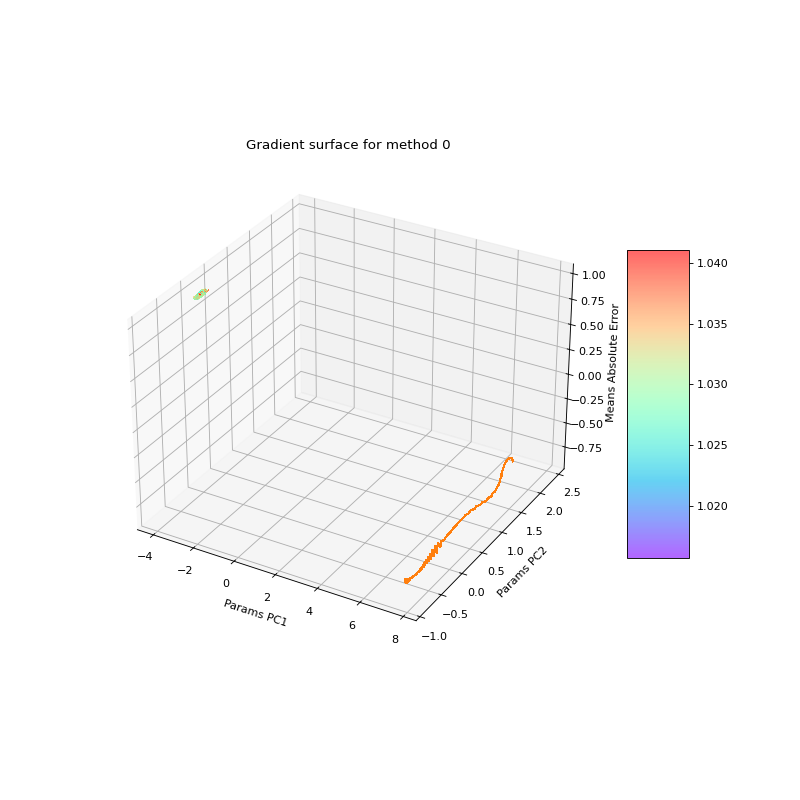

In [49]:
%matplotlib widget
plot_surface(surface0, path=path0, title='Gradient surface for method 0')

Check NaN: False
Explained Variance Ratio: [0.07179541 0.06692732]


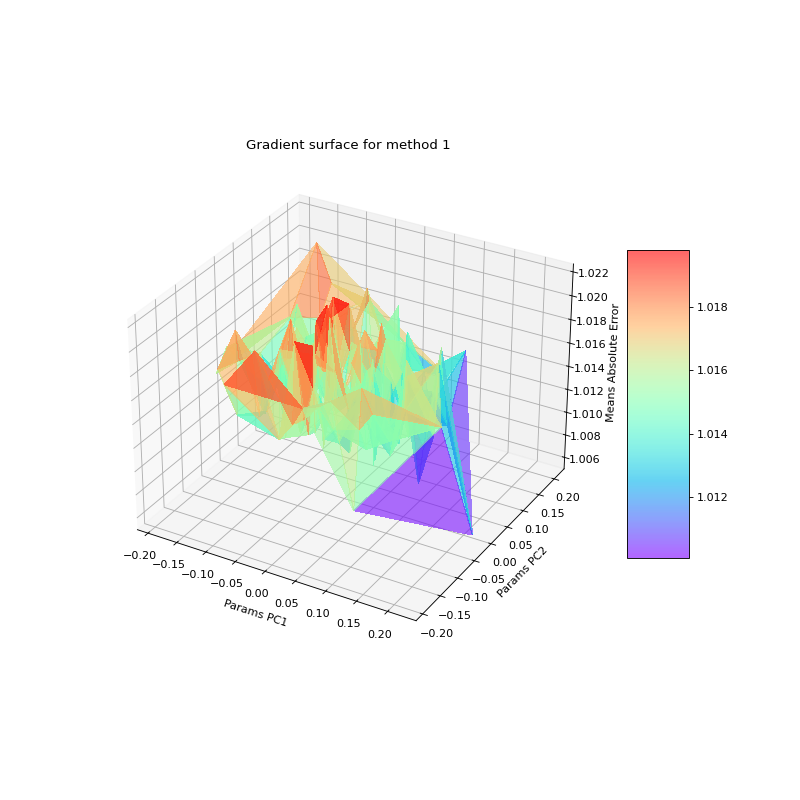

In [20]:
%matplotlib widget
plot_surface(surface1, title='Gradient surface for method 1')

Check NaN: False
Explained Variance Ratio: [0.02892266 0.02581112]


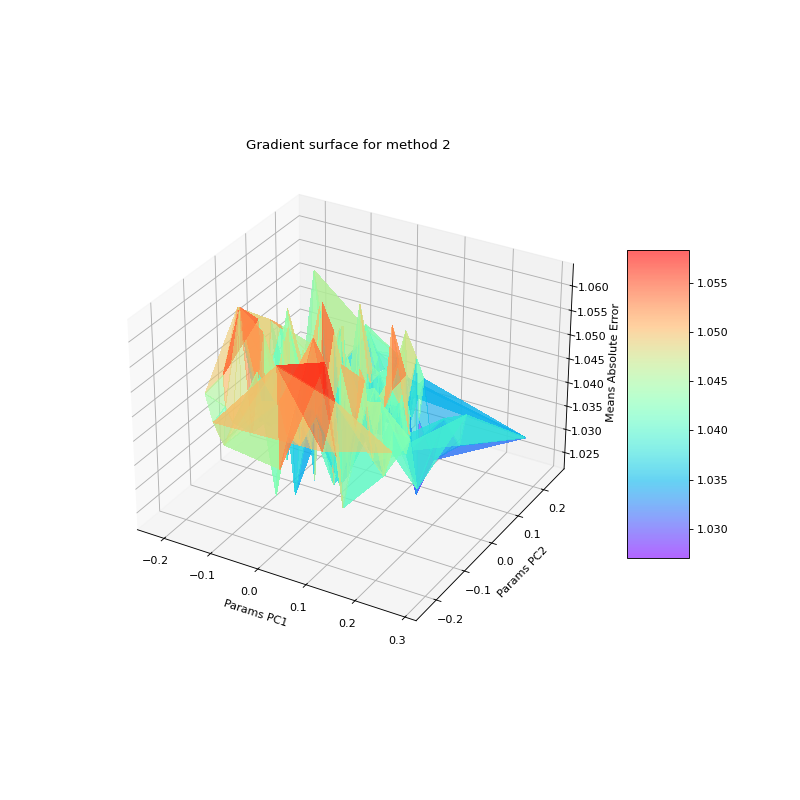

In [21]:
%matplotlib widget
plot_surface(surface2, title='Gradient surface for method 2')

Check NaN: False
Explained Variance Ratio: [0.02604273 0.02515472]


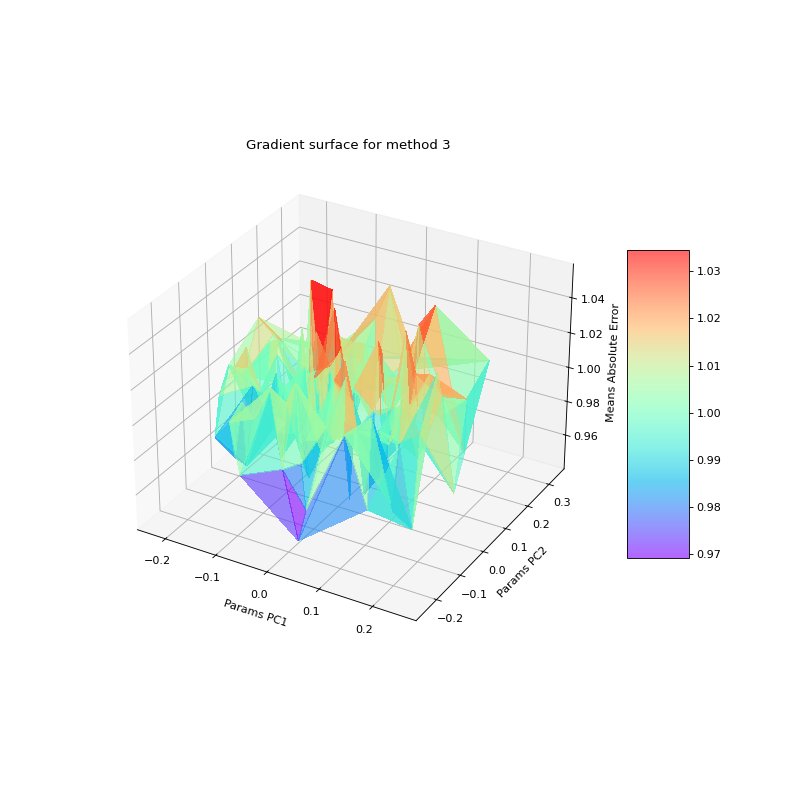

In [22]:
%matplotlib widget
plot_surface(surface3, title='Gradient surface for method 3')